<a href="https://colab.research.google.com/github/tawaqalt/arbritrary/blob/master/Tawakalitu_Yusuf_Mount_fuji_Descent_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
#Importing the data
import numpy as np
csv_path = "https://docbase.io/file_attachments/10df533f-9efa-45ee-ab05-966691804a95.csv"
np.set_printoptions(suppress=True) # Set prohibition of scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
print(fuji[130:140])


[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


## **Problem 1**

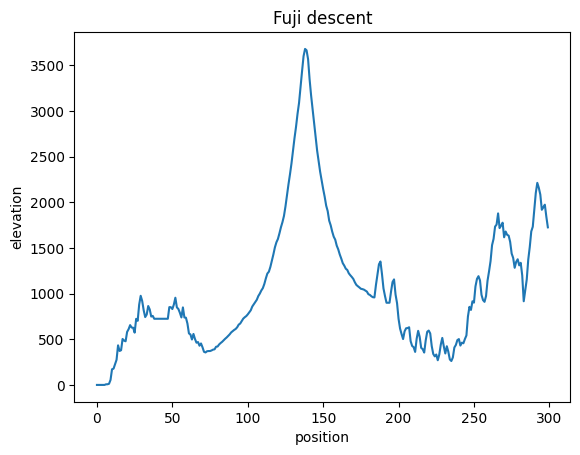

In [87]:
#Visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline
plt.title("Fuji descent")
plt.xlabel("position")
plt.ylabel("elevation")
plt.plot(fuji[:, 0], fuji[:, 3],)
plt.show()

# **Problem 2**

In [88]:
#calculating the gradient
def calculate_gradient(n):
    return (fuji[n, 3] - fuji[n-1, 3]) / (n-(n-1))
calculate_gradient(136)

168.35000000000036

In [89]:
def next_point(current_position, current_elevation, alpha = 0.1):
  next_position = current_position - alpha * calculate_gradient(current_position)
  next_position = np.maximum(1, next_position)
  next_position = np.minimum(len(current_elevation) - 1, next_position)
  next_position_int = np.round(next_position).astype(int)
  return next_position_int

current_position = 136
fuji_elevation = fuji[:,3]

next_position = next_point(current_position, fuji_elevation, alpha = 0.1)

print(current_position, next_position)


136 119


In [90]:
def gradient_descent(position, elevation):
  return elevation[position] - elevation[position-1]


position = 136
fuji_elevation = fuji[:,3]

print(position, gradient_descent(position, fuji_elevation))


136 168.35000000000036


In [91]:
position = np.array([135, 136, 137])
fuji_elevation = fuji[:,3]

next_position = next_point(position, fuji_elevation, alpha = 0.1)

print(position, gradient_descent(position, fuji_elevation), next_position)

[135 136 137] [178.43 168.35 165.49] [117 119 120]


# **Problem 4**

In [100]:
#Calculating the descent
def descend_mountain(start_position, elevation, alpha = 0.1):
  position = [start_position]
  while position[-1] not in position[:-1]:
    position.append(next_point(position[-1], elevation, alpha = 0.1))
  return position

start_position = 136
elevation = fuji[:,3]
alpha = 0.1

descend_list = descend_mountain(start_position, elevation, alpha = 0.1)
print(descend_list)


[136, 119, 113, 108, 105, 102, 100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80, 80]


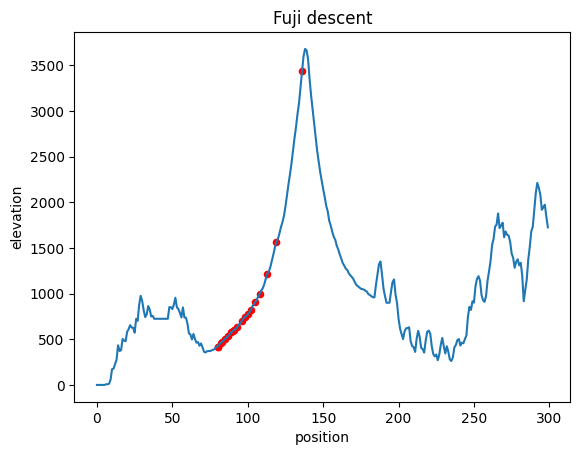

In [101]:
#Visualization of the descent
import matplotlib.pyplot as plt
%matplotlib inline

fuji_elevations = fuji[:,3]
descended_elevations = fuji_elevations[descend_list]

plt.title("Fuji descent")
plt.xlabel("position")
plt.ylabel("elevation")
plt.plot(fuji_elevations)
plt.scatter(descend_list, descended_elevations, 20, 'r')
plt.show()

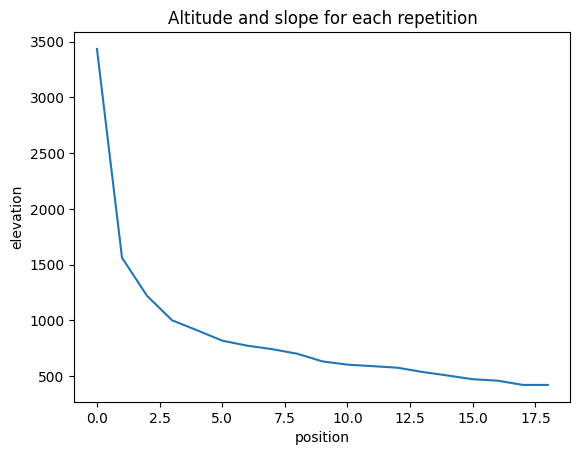

In [94]:
#altitude and slope for each repetition

fuji_elevations = fuji[:,3]
descended_elevations = fuji_elevations[descend_list]

plt.title("Altitude and slope for each repetition")
plt.xlabel("position")
plt.ylabel("elevation")
plt.plot(descended_elevations)
plt.show()

## **Problem 6**

In [113]:
# changing the current location
descend_list = []
for i, start_position in enumerate(range(100, 300)):
  descend_list.append(descend_mountain(start_position, elevation, alpha = 0.2))

print((descend_list))

print("\nLength of the descent process:", len(descend_list))

[[100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80, 80], [101, 99, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80, 80], [102, 100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80, 80], [103, 99, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80, 80], [104, 101, 99, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80, 80], [105, 102, 100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80, 80], [106, 104, 101, 99, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80, 80], [107, 103, 99, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80, 80], [108, 105, 102, 100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80, 80], [109, 106, 104, 101, 99, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80, 80], [110, 107, 103, 99, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80, 80], [111, 106, 104, 101, 99, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80, 80], [112, 106, 104, 101, 99, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80, 80], [113, 108, 105, 102, 100, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82, 80, 80], [114, 112, 106, 104, 101, 99, 98, 96, 93, 91, 90, 89, 87, 85, 83, 82

## **Problem 7**

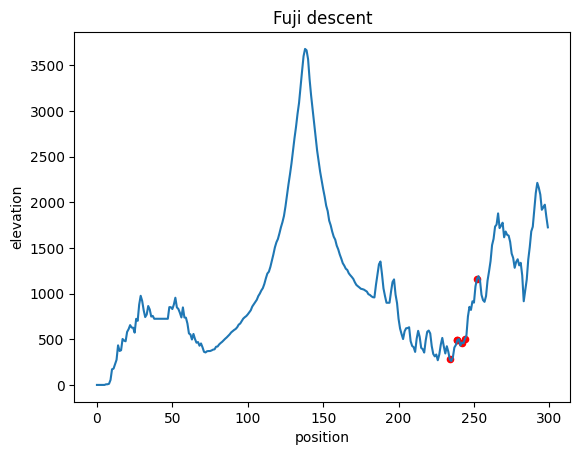

In [96]:
#Visualization of the descent process for each initial value
fuji_elevations = fuji[:,3]

plt.title("Fuji descent")
plt.xlabel("position")
plt.ylabel("elevation")
plt.plot(fuji_elevations)
plt.scatter(descend_list[152], fuji_elevations[descend_list[152]], 20, 'r')

plt.show()


## **Problem 7**

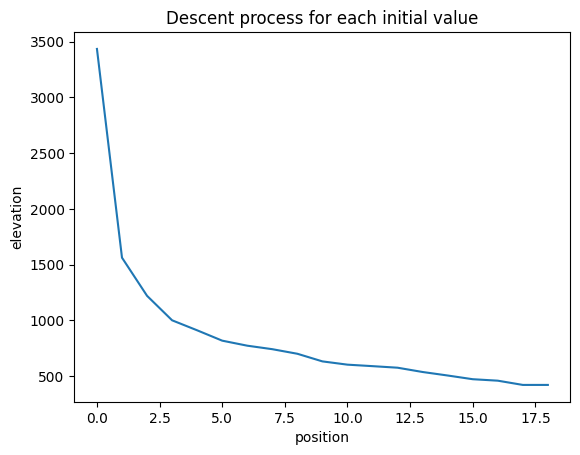

In [102]:
#Descent process for each initial value

fuji_elevation = fuji[:,3]
elevation_descent = fuji_elevation[descend_list]

plt.title("Descent process for each initial value")
plt.xlabel("position")
plt.ylabel("elevation")
plt.plot(elevation_descent)
plt.show()

## **Problem 8**

In [111]:
#Advance problem
start_position = 136
descended_process = np.array([0.006, 0.0056, 0.8956, 0.003453])

descended_list = []
for i, start_position in enumerate(range(100, 300)):
   descended_list.append(descend_mountain(start_position, elevation, alpha = alpha))

print(len(descend_list))

19
